<a href="https://colab.research.google.com/github/Shreya2803/Movie-Recommendation-Website/blob/Data-Preprocessing/Data_Preprocessing_till_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this collab we will undergo IMDB dataset(which contains datas till 2016) and will undergo preprocessing of data

**Import Gdrive**

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


**Importing all the essential Python Libraries**

In [ ]:
#(pandas)to read CSV file
import pandas as pd
#(Numpy)Linear algebra
import numpy as np
import os

**Loading the dataset into Pandas Dataframe**

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/Data Set/movie_metadata.csv')

**Number of rows and columns in the dataset**

In [ ]:
movies.shape

(5043, 28)

**Category of columns**

In [ ]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

**Print the first 8 rows of the dataset**

In [ ]:
movies.head(8)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000


**Importing Matplotlib and Visualizing the Movie Release data in form of Bar Plot**

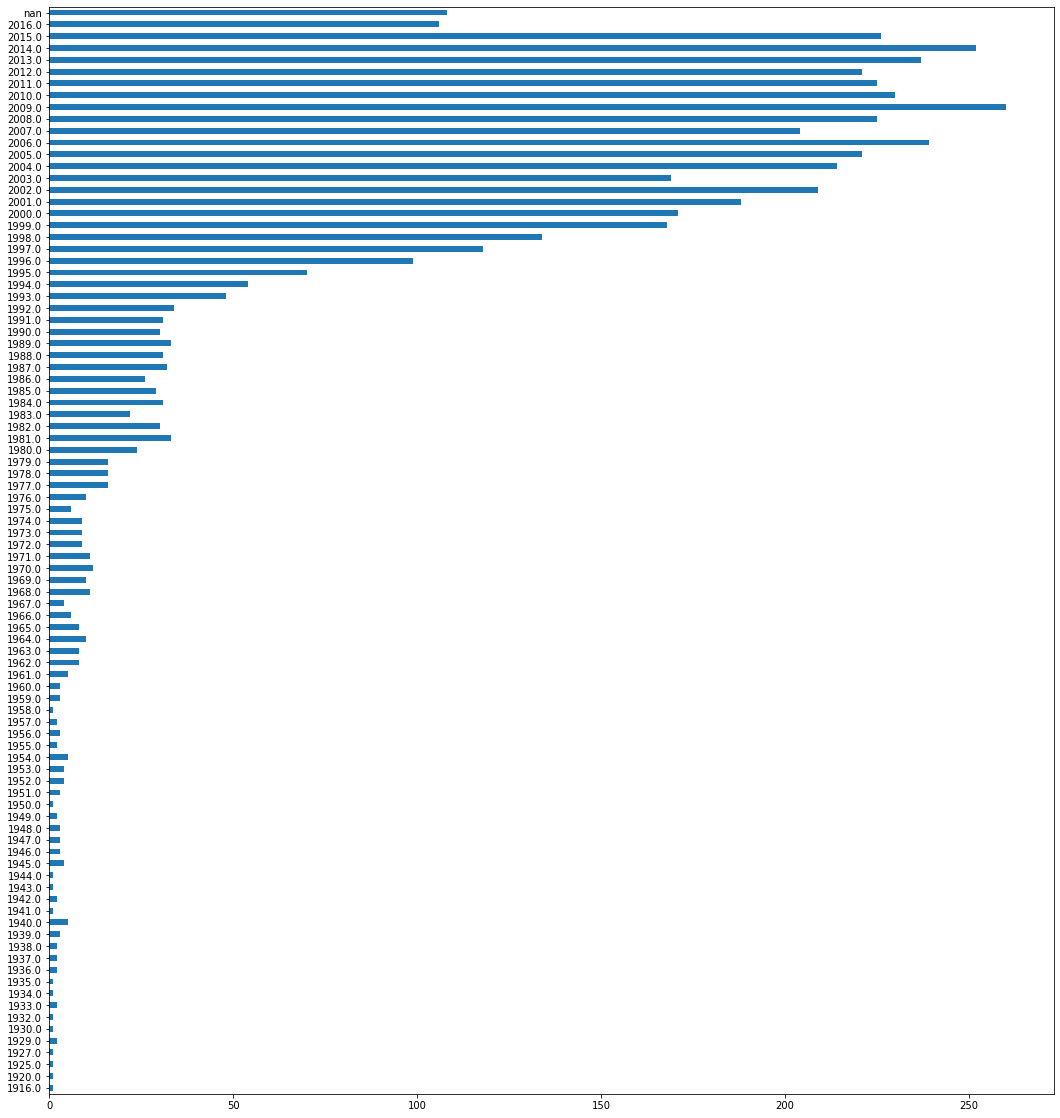

In [ ]:
import matplotlib.pyplot as plt
movies.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(18,20))
plt.show()

**Taking only the necessary columns from the dataset (this features will be used in recommendation)**

In [ ]:
movies = movies[['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

**Print the first 5 rows of the dataset after removing the unnecessary columns**

In [ ]:
movies.head(5)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


**Count the number of missing values in the dataset**

In [ ]:
movies.isnull().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             0
movie_title        0
dtype: int64

**Replacing the missing values of the dataset**

In [ ]:
movies['director_name'] = movies['director_name'].replace(np.nan, 'Not Available')
movies['actor_1_name'] = movies['actor_1_name'].replace(np.nan, 'Not Available')
movies['actor_2_name'] = movies['actor_2_name'].replace(np.nan, 'Not Available')
movies['actor_3_name'] = movies['actor_3_name'].replace(np.nan, 'Not Available')

**Modification of the data**

In [ ]:
movies['movie_title'] = movies['movie_title'].str.lower()
#remove the '|' symbols 
movies['genres'] = movies['genres'].str.replace('|', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
movies

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,star wars: episode vii - the force awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,NaN,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


**In some data there are null terminating Character at the end**

In [ ]:
movies['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

**Remove the null character using Lambda Function**

In [ ]:
movies['movie_title'] = movies['movie_title'].apply(lambda x : x[:-1])

In [ ]:
movies['movie_title'][1]

"pirates of the caribbean: at world's end"

**Save the modified data in A CSV file**

In [ ]:
movies.to_csv('/content/drive/MyDrive/Data Set/data.csv',index=False)